# PROBLEM 1

##### (a). Scatterplot of the dataset:

In [7]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
pwd = os.getcwd()
filepath = os.path.join(pwd, 'faithful.csv')
faithful_df = pd.read_csv(filepath)

In [78]:
faithful_df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [10]:
#for ref
df = faithful_df.iloc[:, 0]
df

0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64

In [11]:
#for ref
df2 = faithful_df.loc[:, ['eruptions', 'waiting']]
df2

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


##### (b) Visualizing the dataset:

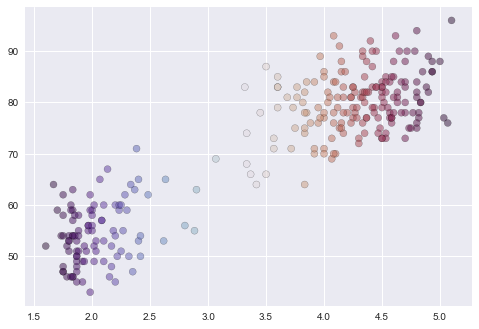

<Figure size 576x432 with 0 Axes>

In [77]:
plt.scatter(faithful_df.eruptions, faithful_df.waiting, c=faithful_df.eruptions, cmap='twilight_shifted', edgecolor='k', alpha=.5)
#plt.colorbar()
plt.figure(figsize=(8,6))
plt.style.use('seaborn')

# PROBLEM 2

##### (a)

### The K-Means Algorithm

##### Defining function that would continue to assign each data point to the randomly selected centroids. This function will not run indefinitely (will always run a finite number of times)

In [17]:
def assign_datapoints(centroids_num, dataset):
    assign_c = []
    data = np.array(dataset)
    for i in data:
        assign_c.append(np.argmin(np.sum((i.reshape((1, 2)) - centroids_num) ** 2, axis=1)))
    return assign_c

##### Defining function that will move centroids to their optimal positions based on the calculated mean distances of the datapoints from the initial randomized centroids

In [18]:
def reposition_centroids(dataset, clusters, positions):
    optim_c = []
    for i in range(len(clusters)):
        optim_c.append(np.mean([dataset[x] for x in range(len(dataset)) if positions[x] == i], axis=0))
    return optim_c

#### To get the centroids randomly, which corresponds to "k" in the K-means algorithm:

##### Choosing k = 2, since that is the number of clusters we could visualize in Problem 1(b)

In [20]:
datarr = np.array(faithful_df)
centroid_number = (np.random.normal(size=(2, 2)) * 0.0001) + (np.mean(datarr, axis=0)).reshape((1, 2))

##### This iteration for finding the optimal positions of the randomly selected K centroids (2, in this case), will be done 100 times:

In [21]:
for i in range(100):
    dp = assign_datapoints(centroid_number, datarr)
    centroids_number = reposition_centroids(datarr, centroid_number, dp)
    centroids_number = np.array(centroids_number)

## The K-means algorithm has been run now!

In [ ]:
#my_ref
from loguru import logger
@logger.catch
def compute_centr(dataset, centr_num, iter_num):
    datarr = np.array(dataset)
    centroid_number = (np.random.normal(size=(centr_num, 2)) * 0.0001) + (np.mean(datarr, axis=0)).reshape((1, 2))
    for i in range(iter_num):
        dp = assign_datapoints(centroid_number, datarr)
        centroids_number = reposition_centroids(datarr, centroid_number, dp)
        centroids_number = np.array(centroids_number)
    return centroids_number, datarr

#my_ref
color = ['green', 'yellow', 'orange', 'purple']
X = faithful_df[['eruptions', 'waiting']]
datarr = np.array(faithful_df)
for i in range(2):
    # dataset = X, number of centroids = 2, number of iterations = 100:
    compute_centr(X, i+1, 100)

## 2(b)

#### Visualizing the scatter plot of the final clustering:

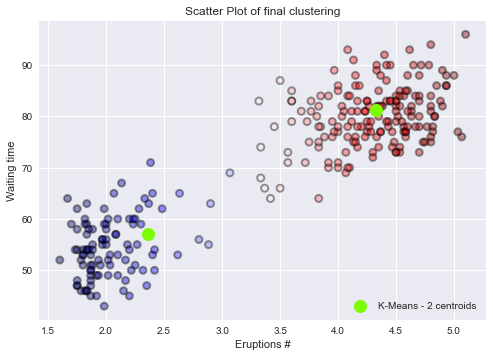

In [66]:
plt.scatter(datarr[:, 0], datarr[:, 1], c=datarr[:, 0], cmap='seismic', lw=2, edgecolor='k', alpha=.4)
plt.scatter(centroids_number[:, 0], centroids_number[:, 1], color='lawngreen', lw=6, label = 'K-Means - 2 centroids')
plt.title('Scatter Plot of final clustering')
plt.xlabel('Eruptions #')
plt.ylabel('Waiting time')
plt.legend(loc="lower right")
# plt.plot(lw=7, label = 'K-Means')
# plt.show()

##### (c)

In [24]:
from sklearn.cluster import KMeans
k = 2
X = faithful_df
kmeans = KMeans(n_clusters=k,random_state=0,max_iter=8)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

In [25]:
y_pred is kmeans.labels_

True

In [26]:
df_y = pd.DataFrame(y_pred)
df_y

,0
0,0
1,1
2,0
3,1
4,0
...,...
267,0
268,1
269,0
270,1


In [27]:
df_y['class'] = df_y
df_y

,0,class
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
267,0,0
268,1,1
269,0,0
270,1,1


In [28]:
kmeans.cluster_centers_

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

In [29]:
kmeans.n_iter_

3

In [30]:
kmeans.score(X)

-8901.76872094721

In [31]:
kmeans.inertia_

8901.76872094721

In [32]:
df_y = df_y ['class']


In [33]:
df_y

0      0
1      1
2      0
3      1
4      0
      ..
267    0
268    1
269    0
270    1
271    0
Name: class, Length: 272, dtype: int32

In [34]:
df = pd.concat([X, df_y], axis=1)
df.head()

,eruptions,waiting,class
0,3.600,79,0
1,1.800,54,1
2,3.333,74,0
3,2.283,62,1
4,4.533,85,0


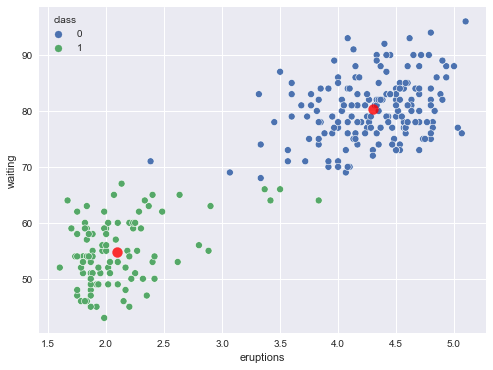

In [35]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='eruptions', y='waiting', hue='class', data=df)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.8)
# plt.scatter(centroids_number[:, 0], centroids_number[:, 1], color='lawngreen', lw=6, label = 'K-Means - 2 centroids')
# plt.scatter(datarr[:, 0], datarr[:, 1], c=datarr[:, 0], cmap='seismic', edgecolor='k', alpha=.4)

##### 2 is the optimum number for K. The following Elbow plot (a plot of the different k iteration inertias against the different values of k) affirms:

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'k-means objective function VS algorithm iterations')

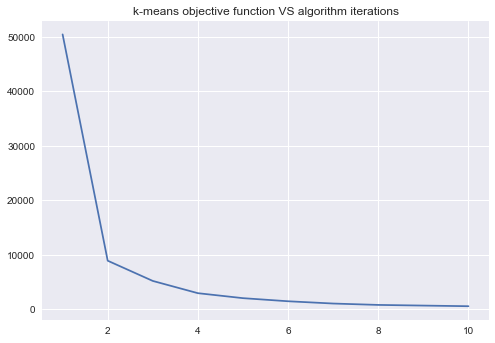

In [67]:
#from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    # default hyperparameter, n_init = 10 (will run 10 times)
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, random_state = 0)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('k-means objective function VS algorithm iterations')

##### The progressive decrease in the objective function can be seen in the plot above. Also, the elbow of the plot is at k=2, which corresponds to the number of clusters identified in problem 1.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


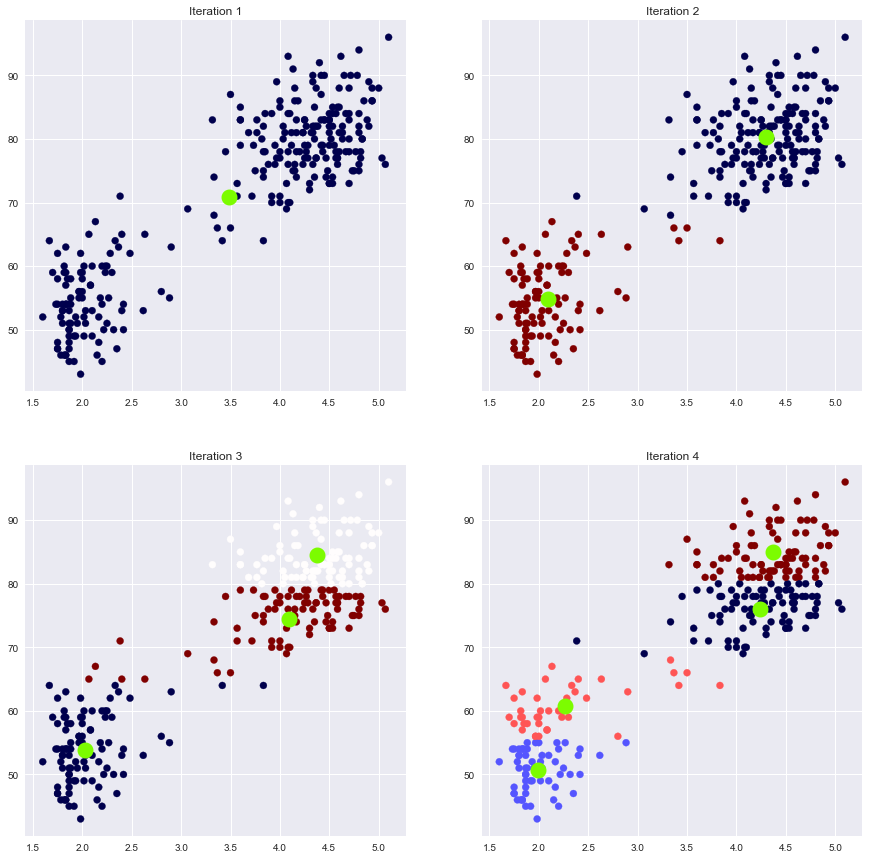

In [71]:
b, x = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
first = second = 0
for i in range(4): # up to 4 intentional randomizations
    x[first, second].title.set_text(f"Iteration {i+1}")
    kmeans = KMeans(n_clusters=i+1,random_state=4,max_iter=i+1)
    y_pred2 = kmeans.fit_predict(X)
    centroids=kmeans.cluster_centers_
    x[first, second].scatter(X['eruptions'],X['waiting'],c=y_pred2, cmap='seismic')
    x[first, second].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, lw=7, c='lawngreen')
    second+=1
    if second==2:
        first+=1
        second=0

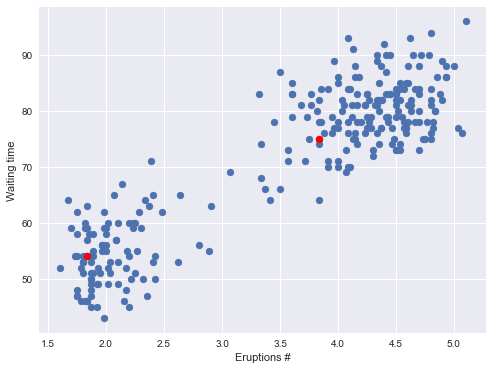

In [82]:
#Centroids picked at random:
k=2
plt.figure(figsize=(8,6))
Centroids = (X.sample(n=k))
plt.scatter(X['eruptions'],X['waiting'])
plt.scatter(Centroids['eruptions'],Centroids['waiting'],c='red')
plt.xlabel('Eruptions #')
plt.ylabel('Waiting time')
plt.show()

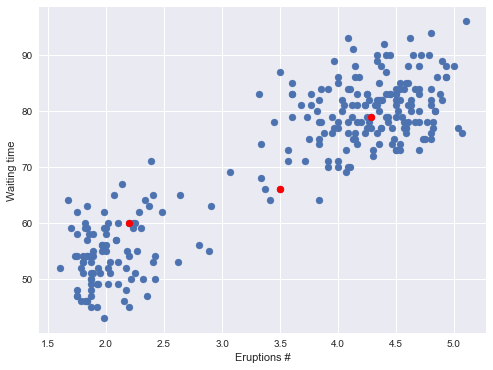

In [60]:
#Centroids picked at random:
k=3
plt.figure(figsize=(8,6))
Centroids = (X.sample(n=k))
plt.scatter(X['eruptions'],X['waiting'])
plt.scatter(Centroids['eruptions'],Centroids['waiting'],c='red')
plt.xlabel('Eruptions #')
plt.ylabel('Waiting time')
plt.show()